# IMDb top 1000 movies dataset analysis
This notebook performs exploratory data analysis on the IMDb top 1000 movies dataset from kaggle to gain insights from it.

### Set up

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Config
sns.set_style("whitegrid") #makes plots look nicer
plt.rcParams["figure.figsize"] = (10, 6) # sets plot size

### Data loading and overview

In [3]:
df = pd.read_csv('../data/imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
shape_tuple = df.shape
print(f"The dataframe rows and columns are {shape_tuple[0]} and {shape_tuple[1]} respectively")

The dataframe rows and columns are 1000 and 16 respectively


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


### Data Cleaning

The Poster_Link column doesn't look very relevant to this EDA. So let's drop it to reduce clutter.

In [6]:
df = df.drop(columns=['Poster_Link'])

Now the Release Year, Runtime and Gross columns are objects, but they should be of numeric. Lets fix it.

In [7]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  999 non-null    float64
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   int64  
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     843 non-null    float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  No_of_Votes    1000 non-null   int64  
 14  Gross          831 non-null    float64
dtypes: float64(4), int64(2), object(9)
memory usage: 117.3+ KB


#### Lets fix non-null.

first lets fix non null of release year column

In [9]:
df[df['Released_Year'].isnull()]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,NaN,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


Lets add release year of this missing value movie by finding actual release year from google search as there is only one

In [10]:
df['Released_Year'] = df['Released_Year'].fillna(1995)
df['Released_Year'] = df['Released_Year'].astype(int)

Now lets fix the certificates column by replacing missing values with 'Unrated' because its hard to find the certificate values manually and its not too relevant to make drop the rows with missing values of it

In [11]:
df['Certificate'] = df['Certificate'].fillna('Unrated')

Now lets deal with the null values in metascore column. since its numeric type, lets visualize the distribution before deciding what to do

Text(0.5, 1.0, 'Distribution of Meta Scores')

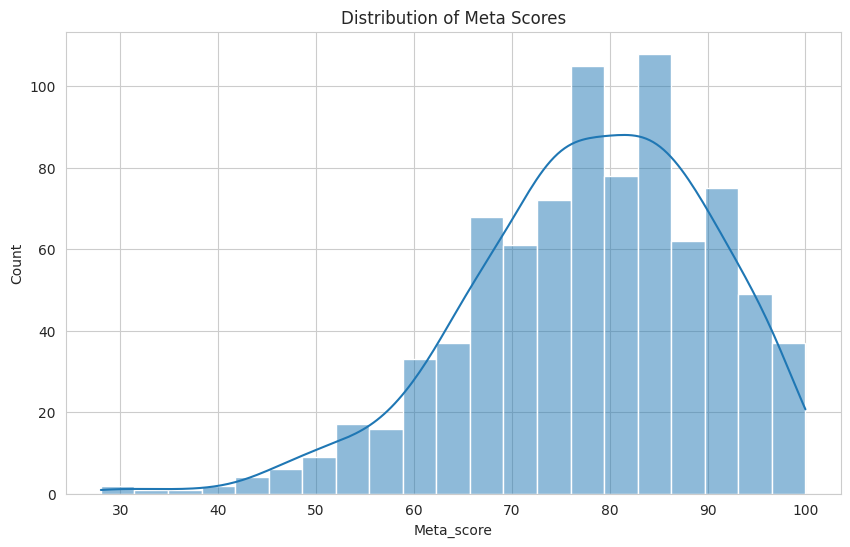

In [12]:
sns.histplot(df['Meta_score'], kde=True)
plt.title('Distribution of Meta Scores')

It doesnt look too symmetric with the tail on left side being longer than the right side. to avoid lower scores
on the left side dragging the mean down, we use median to replace missing values.

In [13]:
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())

Now only remaining column with missing values is gross. It is an important column. Also mean or median may not correctly represent the gross revenue of movies since movies in this are imdb top 1000 and revenue of such movies can vary a lot. So it maybe better to drop rows with missing gross value entirely
But before I do this, lets visualize the gross distribution to confirm our hypothesis

Text(0.5, 1.0, 'Distribution of Gross')

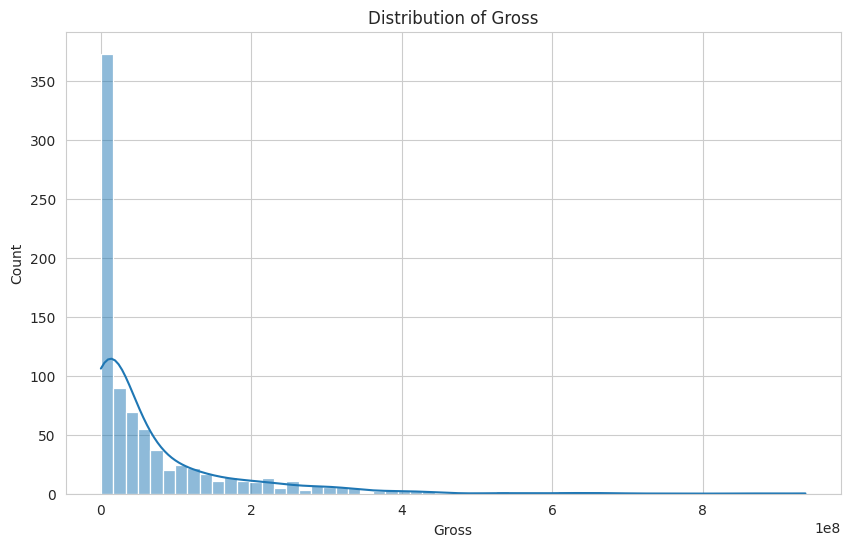

In [14]:
sns.histplot(df['Gross'], kde=True)
plt.title('Distribution of Gross')

Hypothesis is closer to truth according to this graph. For example, many movies earn moderate while some earn huge amount. so lets drop rows with missing gross

In [15]:
median_gross = df['Gross'].median()
print(f"The median gross is: {median_gross}")

The median gross is: 23530892.0


In [16]:
df = df.dropna(subset=['Gross'])

Lets reset the index because we just dropped some rows

In [17]:
df = df.reset_index(drop=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   831 non-null    object 
 1   Released_Year  831 non-null    int64  
 2   Certificate    831 non-null    object 
 3   Runtime        831 non-null    int64  
 4   Genre          831 non-null    object 
 5   IMDB_Rating    831 non-null    float64
 6   Overview       831 non-null    object 
 7   Meta_score     831 non-null    float64
 8   Director       831 non-null    object 
 9   Star1          831 non-null    object 
 10  Star2          831 non-null    object 
 11  Star3          831 non-null    object 
 12  Star4          831 non-null    object 
 13  No_of_Votes    831 non-null    int64  
 14  Gross          831 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 97.5+ KB


It looks clean

Now lets save the df to a cleaned csv file

In [19]:
df.to_csv('../data/cleaned_imdb_top_1000.csv', index=False)

### Exploratory Data Analysis

Lets start the EDA by describing the cleaned dataset

In [20]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,831.000000,831.000000,831.000000,831.000000,8.310000e+02,8.310000e+02
mean,1993.919374,124.078219,7.946931,77.610108,3.152499e+05,6.803475e+07
std,21.135068,27.501455,0.283204,11.877471,3.436443e+05,1.097500e+08
min,1921.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1984.000000,104.000000,7.700000,71.000000,7.143000e+04,3.253559e+06
50%,2000.000000,120.000000,7.900000,79.000000,1.867340e+05,2.353089e+07
75%,2010.000000,138.000000,8.100000,85.500000,4.457210e+05,8.075089e+07
max,2019.000000,242.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


Imdb rating range from 7.6 to 9.3. Not much variance in this, which is expected of top 1000 imdb movies

Runtime average is 124 minute ranging from 45 to 242 minutes

Most interesting is Gross column. Minimum is only 1,305 while maximum is over 9000 million. Median and mean have high difference between eachother. It looks very right skewed and maybe due to few big blockbusters. Further investigation required

#### Univariate Analysis

Now lets visualize distribution of each of imdb rating, runtime and gross one by one in the cleaned dataset

Lets start with imdb rating

Text(0.5, 1.0, 'Distribution of IMDB Rating')

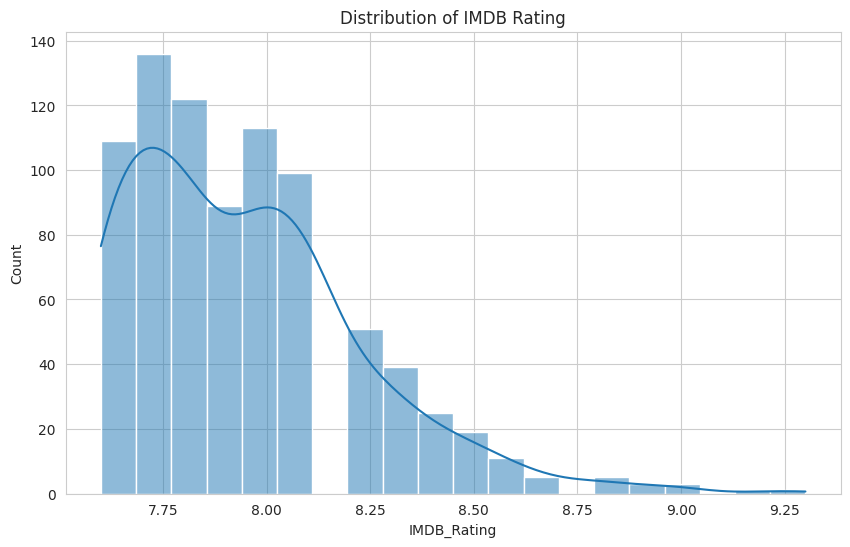

In [21]:
sns.histplot(df['IMDB_Rating'], kde=True)
plt.title('Distribution of IMDB Rating')

Many of the movies in the dataset are mostly appears to be in the 7.6 to 8.2 range. It appears to be exponentially harder for movies to score higher and higher rating above rating of 8.25. Only very few movies score above 9

Now Runtime histogram

Text(0.5, 1.0, 'Distribution of Runtime')

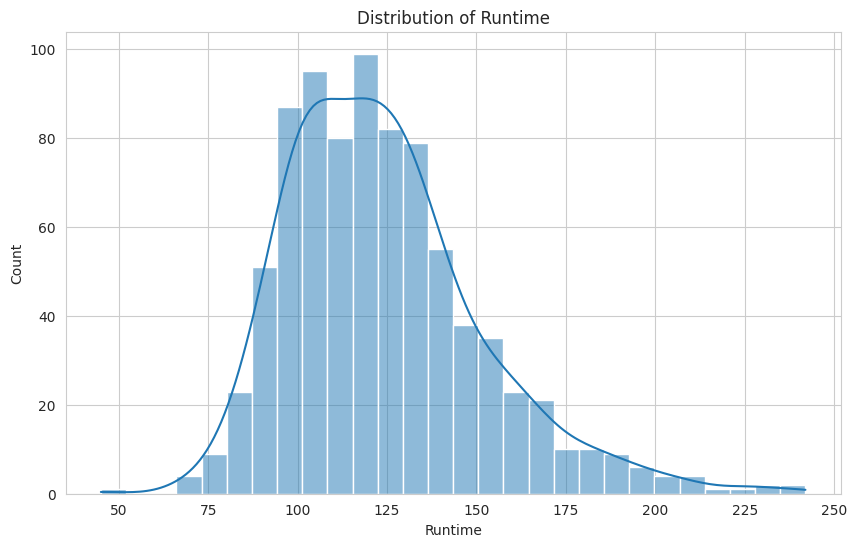

In [22]:
sns.histplot(df['Runtime'], kde=True)
plt.title('Distribution of Runtime')

It looks like most movies are in range of runtime of 1 hour 30 minute and 2 hours few minutes. It looks like its more normal or accepted for top 1000 movies to be very long runtime(like how there is 3 hour movies here) than very short(smaller tail on left side of this graph)

Now most interesting one out of the three, the Gross Histogram

Text(0.5, 1.0, 'Distribution of Gross')

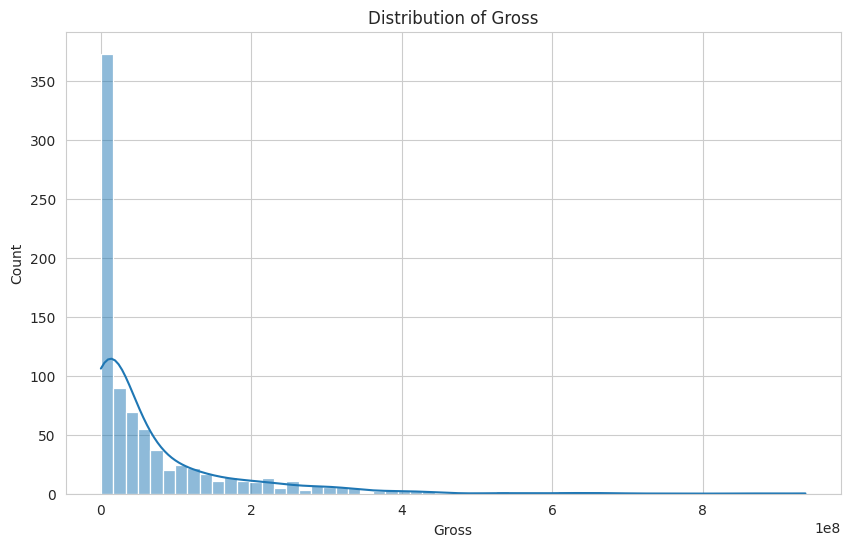

In [23]:
sns.histplot(df['Gross'], kde=True)
plt.title('Distribution of Gross')

After a few google search on graphs shaped like this, it looks like this follows a power law. Most movies earn little but very few movies become blockbusters.

Lets look at which movies are blockbusters

In [24]:
top_earners = df.sort_values(by='Gross', ascending=False).head(10)
top_earners[['Series_Title', 'Released_Year', 'Gross']]

,Series_Title,Released_Year,Gross
388,Star Wars: Episode VII - The Force Awakens,2015,936662225.0
52,Avengers: Endgame,2019,858373000.0
508,Avatar,2009,760507625.0
53,Avengers: Infinity War,2018,678815482.0
536,Titanic,1997,659325379.0
291,The Avengers,2012,623279547.0
733,Incredibles 2,2018,608581744.0
2,The Dark Knight,2008,534858444.0
472,Rogue One,2016,532177324.0
56,The Dark Knight Rises,2012,448139099.0


These are all very popular movies. It also looks like most movies in this most earning top 10 are action, fantasy or drama ones like titanic. we should investigate these further down by grouping movies by genre.

It would be easier to read if the gross was in millions instead of like above. So for future convenience, let's create a new column for gross in millions

In [25]:
df['Gross_Millions'] = df['Gross'] / 1000000

##### Outliers and Boxplots

In previous histograms for gross and runtime, we saw how some values were so far away from rest on the graph. Lets try visualize these outliers, central tendancy, varaibility and such using boxplots

Text(0.5, 1.0, 'Runtime boxplot')

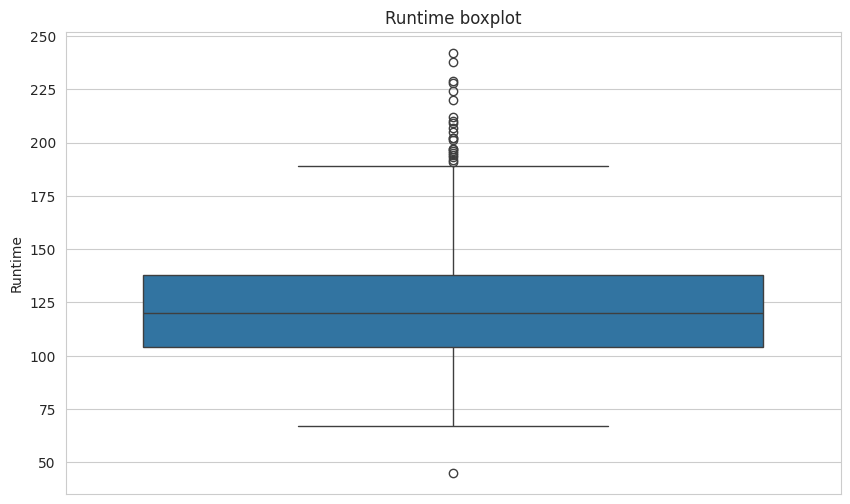

In [26]:
sns.boxplot(data=df, y='Runtime')
plt.title('Runtime boxplot')

The runtime boxplot shows 50% of the movies are almost between 100 and 130 minutes long. This looks like the normal or usual duration for these top films. There are many top outliers but only one bottom outlier.

In [27]:
min_runtime_index = df['Runtime'].idxmin() #index of the movie with the shortest runtime
print(df.loc[min_runtime_index, ['Series_Title', 'Runtime']]) #display the title and runtime of that movie

Series_Title    Sherlock Jr.
Runtime                   45
Name: 162, dtype: object


Text(0.5, 1.0, 'Gross in millions boxplot')

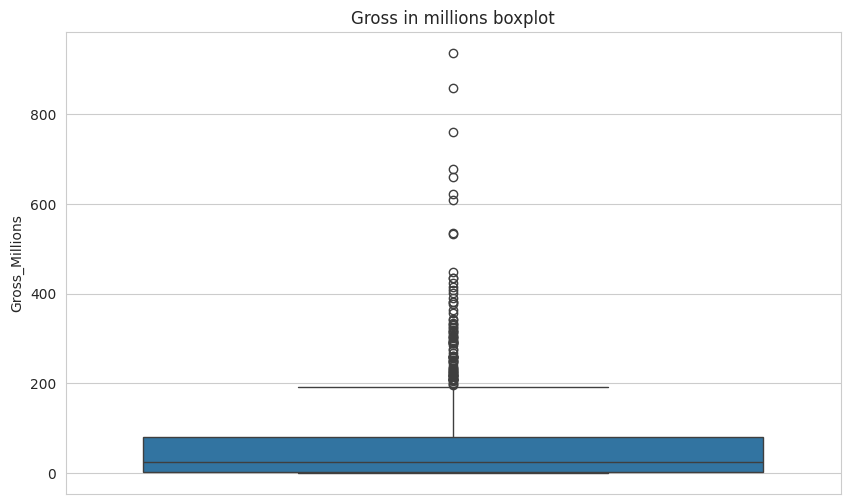

In [28]:
sns.boxplot(data=df, y='Gross_Millions')
plt.title('Gross in millions boxplot')

For gross, the the box is at the bottom and doesnt perform in box office anywhere close to the top outliers which are blockbusters. Median earnings is relatively low. The concentration of outliers gets sparser moving upwards y axis

#### Bivariate Analysis

Do high gross movies get more ratings by people? Lets check this by plotting gross in millions against imdb ratings

Text(0.5, 1.0, 'Ratings vs Gross Revenue')

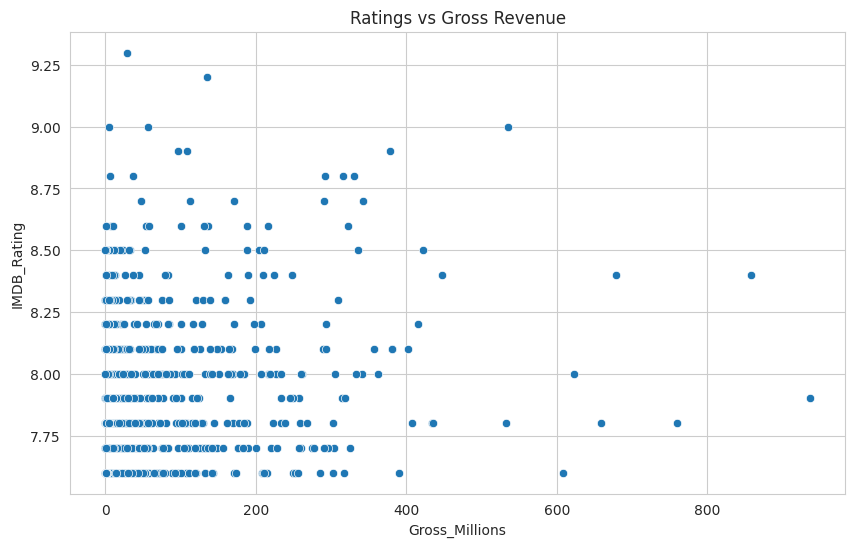

In [29]:
sns.scatterplot(data=df, x='Gross_Millions', y='IMDB_Rating') 
plt.title('Ratings vs Gross Revenue')

The scatter plot is somewhat all over the place. Highest grossing movies dont appear to always have the highest rating. Infact, the highest rating movies are on left side among movies that made less money including some that even got ratings more than 9. It doesnt look like a strong correlation between gross and ratings. we have to look into what all influence ratings.

Lets create correlation matrix for finding what all have high correlation

In [30]:
correl_matrix = df.corr(numeric_only=True) #numeric_only to avoid warning

Now heatmap of the correl_matrix

Text(0.5, 1.0, 'Correlation matrix of movie features')

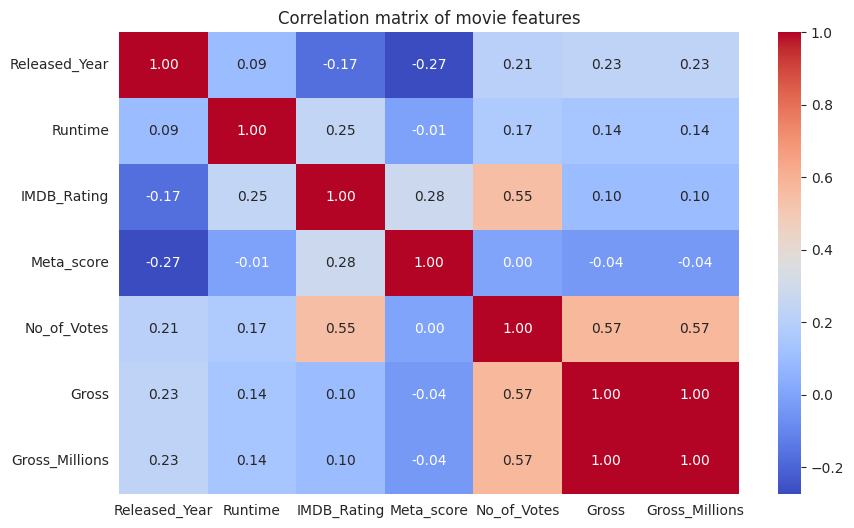

In [31]:
sns.heatmap(correl_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix of movie features')

As we saw before, the correlation between gross and rating is not very strong and only 0.1 here.
But interestingly number of votes have a stronger correlation with ratings and gross with correlation above 0.5. we should investigate this

Lets create scatter plot of number of votes vs ratings first

Text(0.5, 1.0, 'Ratings vs Number of Votes')

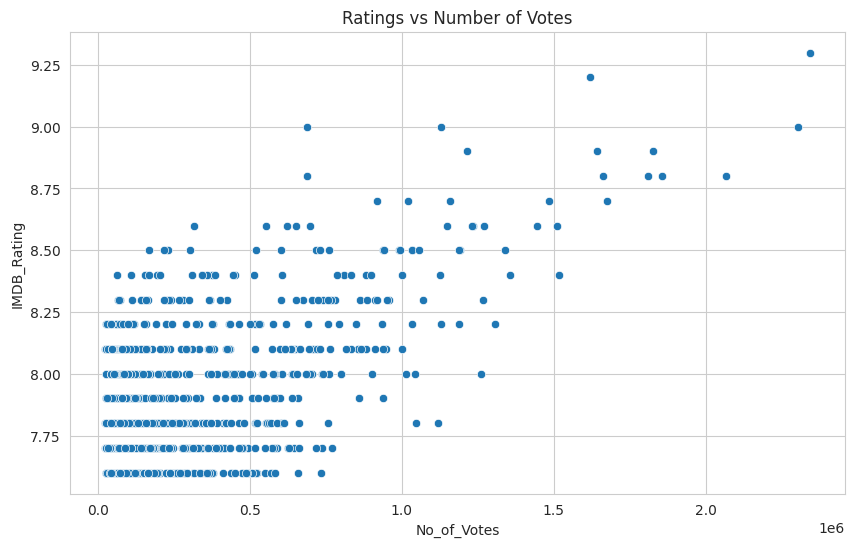

In [32]:
sns.scatterplot(data=df, x='No_of_Votes', y='IMDB_Rating')
plt.title('Ratings vs Number of Votes')

We see imdb ratings spread out for lower number of vote movies, but none of that movies got too high of a rating. But looking towards the right of this graph, it looks like the ratings of the movies does increase with number of votes increase, with the highest voted movies being the highest rated ones.

#### Genre analysis

First we need to split the genres.

In [33]:
genre_df = df.copy() #to avoid messing up original dataframe
genre_df['Genre'] = genre_df['Genre'].str.split(', ')
genre_df = genre_df.explode('Genre')
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2109 entries, 0 to 830
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Series_Title    2109 non-null   object 
 1   Released_Year   2109 non-null   int64  
 2   Certificate     2109 non-null   object 
 3   Runtime         2109 non-null   int64  
 4   Genre           2109 non-null   object 
 5   IMDB_Rating     2109 non-null   float64
 6   Overview        2109 non-null   object 
 7   Meta_score      2109 non-null   float64
 8   Director        2109 non-null   object 
 9   Star1           2109 non-null   object 
 10  Star2           2109 non-null   object 
 11  Star3           2109 non-null   object 
 12  Star4           2109 non-null   object 
 13  No_of_Votes     2109 non-null   int64  
 14  Gross           2109 non-null   float64
 15  Gross_Millions  2109 non-null   float64
dtypes: float64(4), int64(3), object(9)
memory usage: 280.1+ KB


Now lets see which genre movies are most present by grouping these by genre and plotting the graph

<Axes: xlabel='count', ylabel='Genre'>

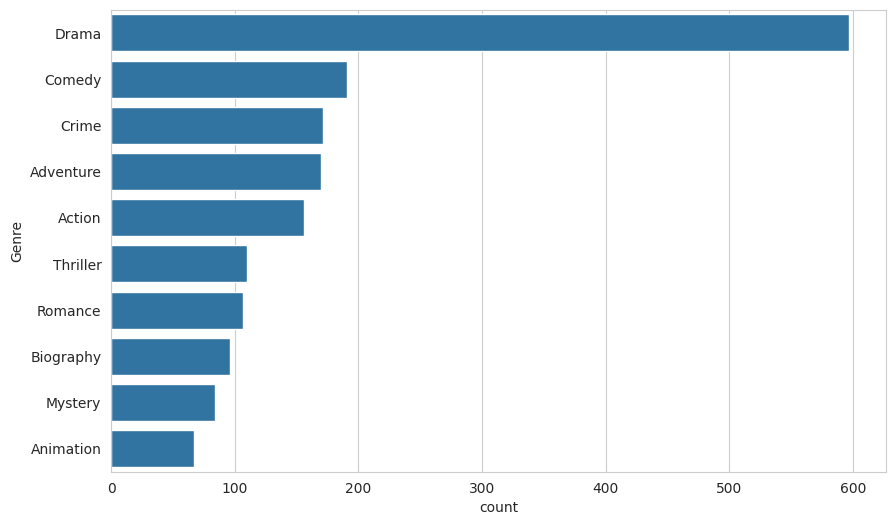

In [34]:
top_genres = genre_df['Genre'].value_counts().head(10).index # to get top 10 genres with most movies
filtered_genre_df = genre_df[genre_df['Genre'].isin(top_genres)] #to include only top genres
sns.countplot(data=filtered_genre_df, y='Genre', order=top_genres) 

Drama movies dominate this dataset and looks like imdb community heavily favors them over thriller, romance, mystery etc. So there are a lot of drama movies in the top 1000, but are they also the highest rated ones?

Lets check the genres with highest average ratings

(7.5, 9.4)

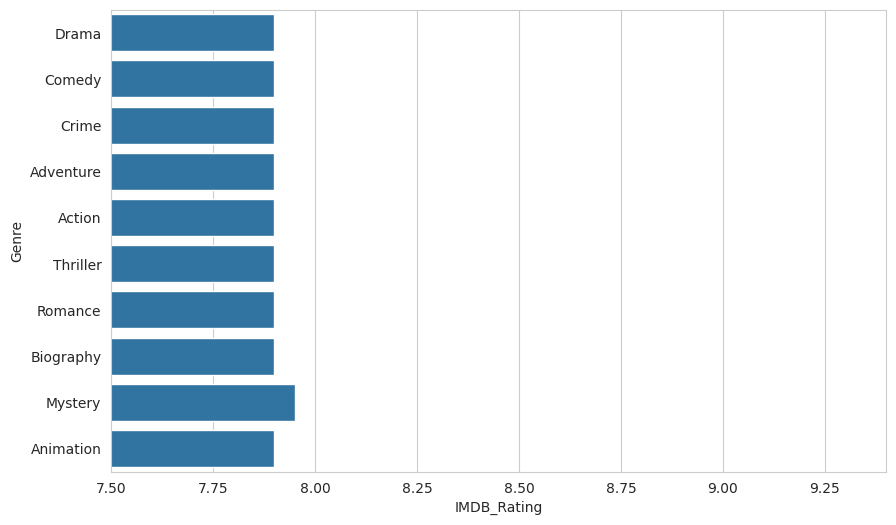

In [35]:
genre_ratings = genre_df.groupby('Genre')['IMDB_Rating'].median().reset_index() 
genre_ratings = genre_ratings.sort_values(by='IMDB_Rating', ascending=False) #sort genres by average rating
filtered_ratings = genre_ratings[genre_ratings['Genre'].isin(top_genres)] #filter to include only top genres
sns.barplot(data=filtered_ratings, x='IMDB_Rating', y='Genre', order=top_genres)
plt.xlim(7.5, 9.4) #set rating limits for better visualization

Mystery appears to have the highest average rating. but overall, the mean rating of all genres are very close and dont have too much of a difference

Creating boxplots of these top 10 genres based on their gross will help understand how they are performing in box office

<Axes: xlabel='Genre', ylabel='Gross_Millions'>

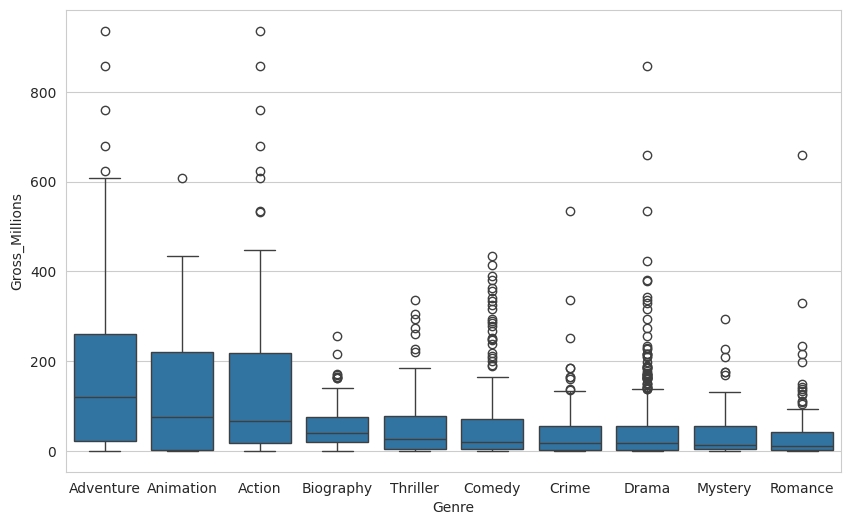

In [36]:
genre_order = filtered_genre_df.groupby('Genre')['Gross_Millions'].median().sort_values(ascending=False).index # 
sns.boxplot(data=filtered_genre_df, x='Genre', y='Gross_Millions', order=genre_order)

Surprisingly, adventure genre has the highest median gross among top genres. Animation also performs very well, but has few outliers than adventure.
Action is also on par with animation based on interquartile range and is third most well performing, but has more outliers that become blockbusters than animation. Drama, despite having most volume of movies in this list as seen previously, here has very low median gross. So most movies perform not that great in box office except the many outliers that become blockbusters. 

Now lets see which directors have most movies in this list

In [37]:
top_directors = df['Director'].value_counts().head(10)
top_directors

Director
Steven Spielberg     13
Martin Scorsese      10
Alfred Hitchcock      9
Christopher Nolan     8
Woody Allen           8
Clint Eastwood        8
David Fincher         8
Quentin Tarantino     8
Rob Reiner            7
Hayao Miyazaki        7
Name: count, dtype: int64

Lets visualize this

<Axes: ylabel='Director'>

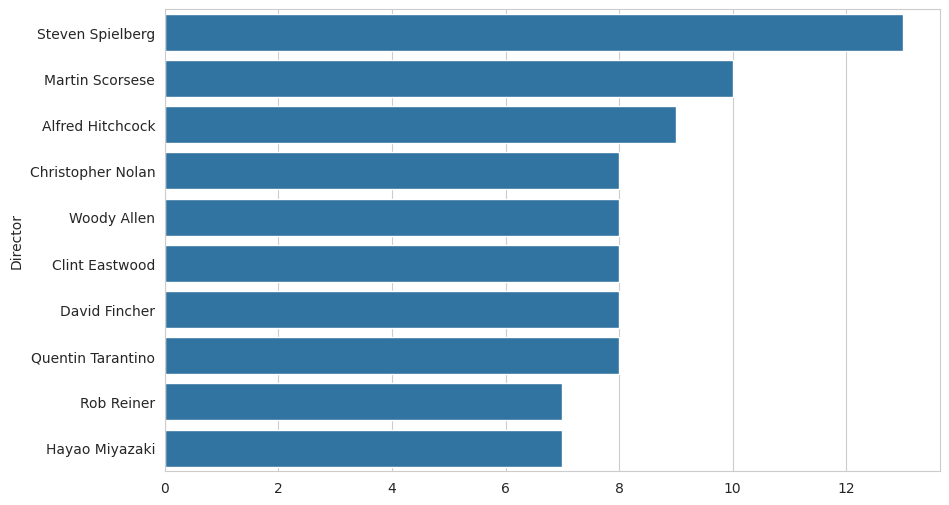

In [38]:
sns.barplot(x=top_directors.values, y=top_directors.index)

In [39]:
top_directors_list = top_directors.index.tolist() #turn top directors into a list
df_top_director = df[df['Director'].isin(top_directors_list)] #filter dataframe to include only top directors
average_ratings = df_top_director.groupby('Director')['IMDB_Rating'].median().sort_values(ascending=False)
average_ratings



Director
Christopher Nolan    8.45
Alfred Hitchcock     8.20
Martin Scorsese      8.20
Hayao Miyazaki       8.20
Quentin Tarantino    8.20
Steven Spielberg     8.00
Clint Eastwood       7.90
Woody Allen          7.80
David Fincher        7.80
Rob Reiner           7.80
Name: IMDB_Rating, dtype: float64

<Axes: ylabel='Director'>

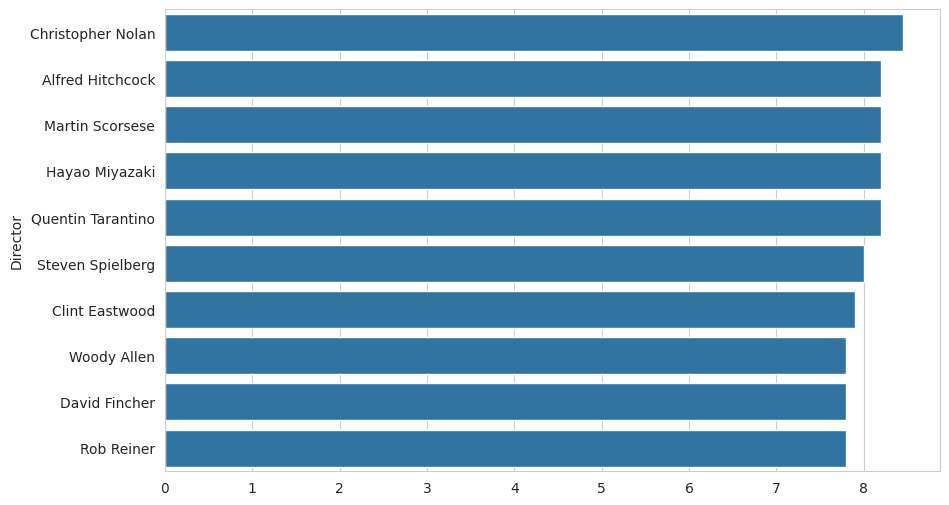

In [40]:
sns.barplot(x=average_ratings.values, y=average_ratings.index)

Christopher Nolan is in third place based on amount of movies but has highest average rating among the top 10 directors

#### Time Trends
Lets see how cinema has changed throughout the years

Text(0.5, 1.0, 'Number of movies released per year')

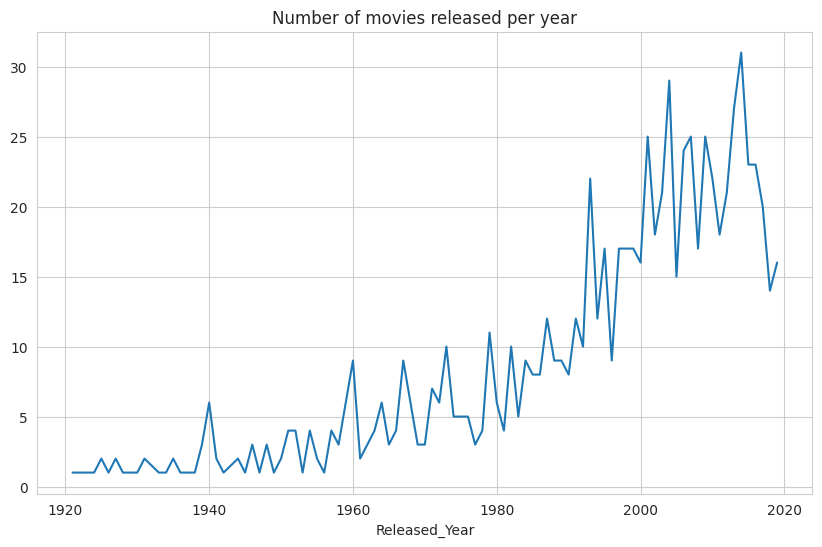

In [41]:
movies_per_year = df['Released_Year'].value_counts().sort_index() #sort_index to make sure years are in order for graph
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title('Number of movies released per year')

Number of movies in dataset increased with time

In [42]:
year_with_most_movies = movies_per_year.idxmax()
year_with_most_movies

np.int64(2014)

Most movies in the df is from year 2014

##### Decade wise analysis

In [50]:
df['Decade'] = (df['Released_Year'] // 10) * 10 #new column Decade by floor rounding Released_Year to nearest decade
print(df[['Series_Title', 'Decade']].head(10)) 

                                    Series_Title  Decade
0                       The Shawshank Redemption    1990
1                                  The Godfather    1970
2                                The Dark Knight    2000
3                         The Godfather: Part II    1970
4                                   12 Angry Men    1950
5  The Lord of the Rings: The Return of the King    2000
6                                   Pulp Fiction    1990
7                               Schindler's List    1990
8                                      Inception    2010
9                                     Fight Club    1990


Text(0.5, 1.0, 'Number of movies per Decade')

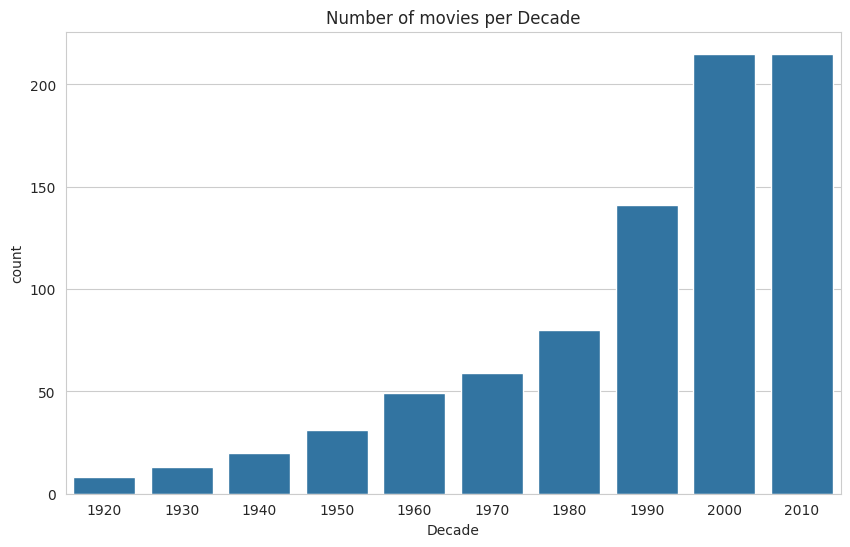

In [48]:
sns.countplot(data=df, x='Decade')
plt.title('Number of movies per Decade')

The 2000-2009 and 2010-2019 decades have the most and almost equal number of movies in the df

<Axes: xlabel='Decade', ylabel='IMDB_Rating'>

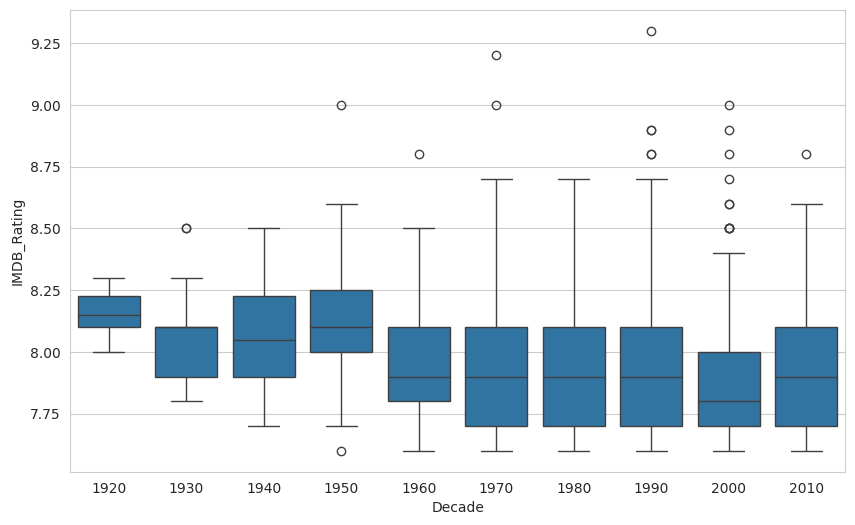

In [97]:
decades_order = sorted(df['Decade'].unique()) #creates a sorted list of unique decades for ordering plot
sns.boxplot(data=df, x='Decade', y='IMDB_Rating', order=decades_order)

Older decade movies tend to have better average ratings and low number of outlier ratings, meanwhile newer decade movies tend to have highest ratings that are outliers with lower average ratings